## Chapter 16. 실전 데이터 분석

### 16.1. 볼린저 밴드와 주가 동향 분석

In [1]:
# 코드 16-1. 주가 엑셀 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째 자리 출력

url1 = 'https://github.com/panda-kim/book1/blob/main/26BB.xlsx?raw=true'
df = pd.read_excel(url1, parse_dates=['Date'])
df

,Date,Name,Open,High,Low,Close,Volume
0,2020-01-02,삼성전자,55500,56000,55000,55200,12993228
1,2020-01-02,카카오,30909,31010,30508,30609,241047
2,2020-01-03,삼성전자,56000,56600,54900,55500,15422255
...,...,...,...,...,...,...,...
2109,2024-04-09,카카오,49100,50100,48850,49250,775713
2110,2024-04-11,삼성전자,83200,84700,82500,84100,16963755
2111,2024-04-11,카카오,48450,48800,47700,48050,1162553


In [2]:
# 코드 16-2. info 함수로 데이터 프레임 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2112 non-null   datetime64[ns]
 1   Name    2112 non-null   object        
 2   Open    2112 non-null   int64         
 3   High    2112 non-null   int64         
 4   Low     2112 non-null   int64         
 5   Close   2112 non-null   int64         
 6   Volume  2112 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 115.6+ KB


In [3]:
# 코드 16-3. 볼린저 밴드 생성하기
# 표본의 크기와 표준점수 지정
n, z = 20, 2 # 20일 이동 평균선 기준, 신뢰도 95%의 표준점수 지정

# 20일 이동 평균(avg)과 20일 이동 표준편차(sd) 구하기
avg = df.groupby('Name').rolling(n)['Close'].mean().droplevel(0)
sd = df.groupby('Name').rolling(n)['Close'].std(ddof=0).droplevel(0)

# 볼린저 밴드의 중심선을 BB_Middle 열로 생성
df['BB_Middle'] = avg

# 볼린저 밴드의 상한선을 BB_Upper 열로 생성
df['BB_Upper'] = avg + (sd * z)

# 볼린저 밴드의 하한선을 BB_Lower 열로 생성
df['BB_Lower'] = avg - (sd * z)

# df 출력
df

,Date,Name,Open,High,Low,Close,Volume,BB_Middle,BB_Upper,BB_Lower
0,2020-01-02,삼성전자,55500,56000,55000,55200,12993228,NaN,NaN,NaN
1,2020-01-02,카카오,30909,31010,30508,30609,241047,NaN,NaN,NaN
2,2020-01-03,삼성전자,56000,56600,54900,55500,15422255,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2109,2024-04-09,카카오,49100,50100,48850,49250,775713,52637.50,56759.13,48515.87
2110,2024-04-11,삼성전자,83200,84700,82500,84100,16963755,80075.00,88566.38,71583.62
2111,2024-04-11,카카오,48450,48800,47700,48050,1162553,52310.00,56781.87,47838.13


### 16.2. 머니볼과 야구 데이터 분석

In [4]:
# 코드 16-4. 메이저 리그 시즌 팀 성적 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
pd.options.display.float_format = '{:.3f}'.format # 소수점 셋째 자리 출력
url2 = 'https://github.com/panda-kim/book1/blob/main/27moneyball.xlsx?raw=true'
df1 = pd.read_excel(url2)
df1

,Season,Team,TG,PA,HR,R,SB,BB%,K%,AVG,OBP,SLG,OPS
0,2000,ANA,162,6373,236,864,93,9.5%,16.1%,0.280,0.352,0.472,0.824
1,2000,BAL,162,6238,184,794,126,8.9%,14.4%,0.272,0.341,0.435,0.776
2,2000,BOS,162,6371,167,792,43,9.6%,16.0%,0.267,0.341,0.423,0.764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2023,STL,162,6204,209,719,101,9.2%,21.4%,0.250,0.326,0.416,0.742
718,2023,SDP,162,6180,205,752,137,10.6%,21.2%,0.244,0.329,0.413,0.742
719,2023,SFG,162,6095,174,674,57,8.9%,24.5%,0.235,0.312,0.383,0.695


In [5]:
# 코드 16-5. info 함수로 데이터 프레임 확인하기
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  720 non-null    int64  
 1   Team    720 non-null    object 
 2   TG      720 non-null    int64  
 3   PA      720 non-null    int64  
 4   HR      720 non-null    int64  
 5   R       720 non-null    int64  
 6   SB      720 non-null    int64  
 7   BB%     720 non-null    object 
 8   K%      720 non-null    object 
 9   AVG     720 non-null    float64
 10  OBP     720 non-null    float64
 11  SLG     720 non-null    float64
 12  OPS     720 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage: 73.2+ KB


In [6]:
# 코드 16-6. BB% 열과 K% 열을 수치형 데이터로 변환하기
df1['BB%'] = df1['BB%'].str.replace('%', '').astype('float').div(100)
df1['K%'] = df1['K%'].str.replace('%', '').astype('float').div(100)
df1

,Season,Team,TG,PA,HR,R,SB,BB%,K%,AVG,OBP,SLG,OPS
0,2000,ANA,162,6373,236,864,93,0.095,0.161,0.280,0.352,0.472,0.824
1,2000,BAL,162,6238,184,794,126,0.089,0.144,0.272,0.341,0.435,0.776
2,2000,BOS,162,6371,167,792,43,0.096,0.160,0.267,0.341,0.423,0.764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2023,STL,162,6204,209,719,101,0.092,0.214,0.250,0.326,0.416,0.742
718,2023,SDP,162,6180,205,752,137,0.106,0.212,0.244,0.329,0.413,0.742
719,2023,SFG,162,6095,174,674,57,0.089,0.245,0.235,0.312,0.383,0.695


In [7]:
# 코드 16-7. 다수의 열에 문자열 함수를 사용할 때는 apply를 사용한다.
df2 = pd.read_excel(url2)
cols1 = ['BB%', 'K%']
df2[cols1] = (df2[cols1]
              .apply(lambda x: x.str.replace('%', ''))
              .astype('float')
              .div(100)
)
df2

,Season,Team,TG,PA,HR,R,SB,BB%,K%,AVG,OBP,SLG,OPS
0,2000,ANA,162,6373,236,864,93,0.095,0.161,0.280,0.352,0.472,0.824
1,2000,BAL,162,6238,184,794,126,0.089,0.144,0.272,0.341,0.435,0.776
2,2000,BOS,162,6371,167,792,43,0.096,0.160,0.267,0.341,0.423,0.764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2023,STL,162,6204,209,719,101,0.092,0.214,0.250,0.326,0.416,0.742
718,2023,SDP,162,6180,205,752,137,0.106,0.212,0.244,0.329,0.413,0.742
719,2023,SFG,162,6095,174,674,57,0.089,0.245,0.235,0.312,0.383,0.695


In [8]:
# 코드 16-8. PA, HR, R, SB 열을 경기당 평균 수치로 변경하기
# 변경할 열들을 변수 cols로 지정하기
cols = ['PA', 'HR', 'R', 'SB']

# cols 열의 수치를 경기 수(TG)로 나누기
df1[cols] = df1[cols].div(df1['TG'], axis=0)

# cols 열의 이름에 '/G'를 추가하기
df1 = df1.rename(lambda x: x + '/G' if x in cols else x, axis=1)
df1

,Season,Team,TG,PA/G,HR/G,R/G,SB/G,BB%,K%,AVG,OBP,SLG,OPS
0,2000,ANA,162,39.340,1.457,5.333,0.574,0.095,0.161,0.280,0.352,0.472,0.824
1,2000,BAL,162,38.506,1.136,4.901,0.778,0.089,0.144,0.272,0.341,0.435,0.776
2,2000,BOS,162,39.327,1.031,4.889,0.265,0.096,0.160,0.267,0.341,0.423,0.764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2023,STL,162,38.296,1.290,4.438,0.623,0.092,0.214,0.250,0.326,0.416,0.742
718,2023,SDP,162,38.148,1.265,4.642,0.846,0.106,0.212,0.244,0.329,0.413,0.742
719,2023,SFG,162,37.623,1.074,4.160,0.352,0.089,0.245,0.235,0.312,0.383,0.695


In [9]:
# 코드 16-9. df1에서 Season, Team, TG를 제외한 열들의 상관관계 구하기
df_corr = df1.loc[:, 'PA/G':].corr()
df_corr

,PA/G,HR/G,R/G,SB/G,BB%,K%,AVG,OBP,SLG,OPS
PA/G,1.000,0.263,0.719,0.023,0.479,-0.512,0.723,0.833,0.624,0.739
HR/G,0.263,1.000,0.665,-0.166,0.416,0.255,0.122,0.350,0.793,0.676
R/G,0.719,0.665,1.000,0.011,0.520,-0.294,0.696,0.852,0.915,0.946
...,...,...,...,...,...,...,...,...,...,...
OBP,0.833,0.350,0.852,0.045,0.602,-0.545,0.828,1.000,0.758,0.893
SLG,0.624,0.793,0.915,-0.065,0.378,-0.221,0.674,0.758,1.000,0.970
OPS,0.739,0.676,0.946,-0.028,0.484,-0.354,0.772,0.893,0.970,1.000


In [10]:
# 코드 16-10. R/G 열(경기당 평균 득점)과 각 열의 상관관계 확인
pd.options.display.max_rows = None # 행 출력 옵션 리셋
s = df_corr['R/G'].drop('R/G').sort_values(ascending=False)
s

OPS     0.946
SLG     0.915
OBP     0.852
PA/G    0.719
AVG     0.696
HR/G    0.665
BB%     0.520
SB/G    0.011
K%     -0.294
Name: R/G, dtype: float64

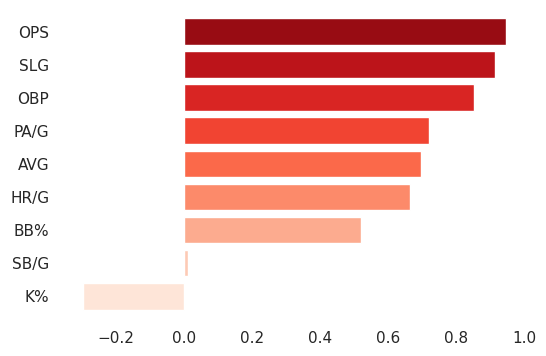

In [11]:
# 코드 16-11. R/G 열(경기당 평균 득점)과 상관 관계 그래프로 확인하기

# Reds 팔레트에서 색상 9개 추출하기
import seaborn as sns
c = sns.color_palette('Reds', 9)

# seaborn 라이브러리의 테마 설정
sns.set_theme(style='white')

# s의 역순으로 수평 막대그래프 그리기
s[::-1].plot(kind='barh', color=c, figsize=(6, 4), width=.8)

# 축 테두리 제거
sns.despine(bottom=True, left=True)

<Axes: >

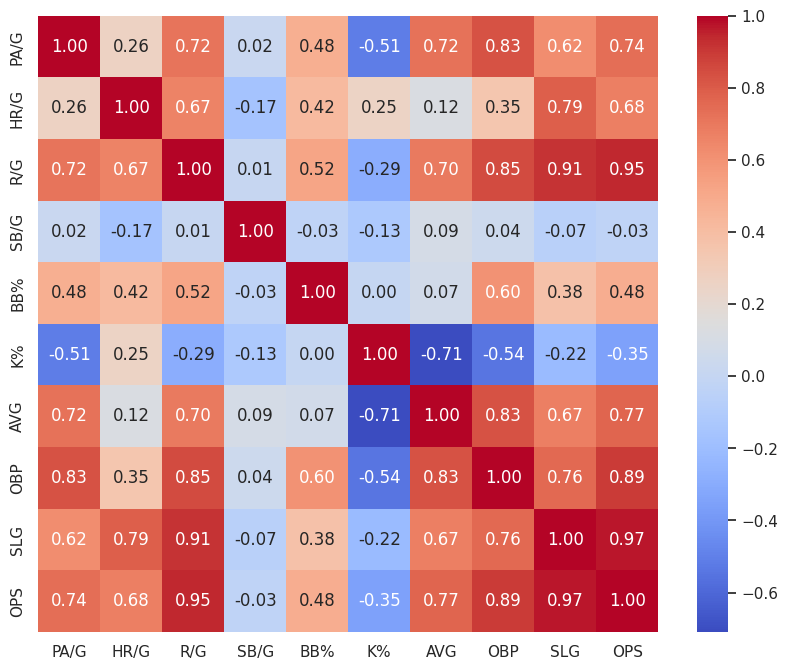

In [12]:
# 코드 16-12. df_corr의 상관 관계 히트맵 그래프로 표현하기
# seaborn의 테마와 그래프 크기 지정
sns.set_theme(style='white', rc={'figure.figsize': (10, 8)})

# df_corr으로 히트맵 그래프 그리기
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')

### 16.3. 축구 국가대표 A매치 결과 분석

In [13]:
# 코드 16-13. 축구 국가대표 A매치 전적 파일에서 데이터 프레임 불러오기
import numpy as np
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째 자리 출력
url3 = 'https://github.com/panda-kim/book1/blob/main/28fifa.xlsx?raw=true'
df_fifa = pd.read_excel(url3, parse_dates=['date'])
df_fifa

,date,team,continent,H/A,oppenent,op_continent,scored_goal,conceded_goal,tournament,result
0,1994-01-02,Barbados,North America,Home,Grenada,North America,0,0,Frendly,Draw
1,1994-01-02,Grenada,North America,Away,Barbados,North America,0,0,Frendly,Draw
2,1994-01-02,Egypt,Africa,Home,Ghana,Africa,1,2,Frendly,Lose
...,...,...,...,...,...,...,...,...,...,...
46355,2021-12-30,Ethiopia,Africa,Away,Sudan,Africa,3,2,Frendly,Win
46356,2021-12-31,Comoros,Africa,Home,Malawi,Africa,1,2,Frendly,Lose
46357,2021-12-31,Malawi,Africa,Away,Comoros,Africa,2,1,Frendly,Win


In [14]:
# 코드 16-14. info 함수로 데이터 프레임 확인하기
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46358 entries, 0 to 46357
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           46358 non-null  datetime64[ns]
 1   team           46358 non-null  object        
 2   continent      46358 non-null  object        
 3   H/A            46358 non-null  object        
 4   oppenent       46358 non-null  object        
 5   op_continent   46358 non-null  object        
 6   scored_goal    46358 non-null  int64         
 7   conceded_goal  46358 non-null  int64         
 8   tournament     46358 non-null  object        
 9   result         46358 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 3.5+ MB


In [15]:
# 코드 16-15. 경기 수가 많은 나라 top5 구하기
df_fifa['team'].value_counts()[:5]

team
Mexico          496
Saudi Arabia    455
USA             445
Korea           419
Brazil          419
Name: count, dtype: int64

<Axes: ylabel='team'>

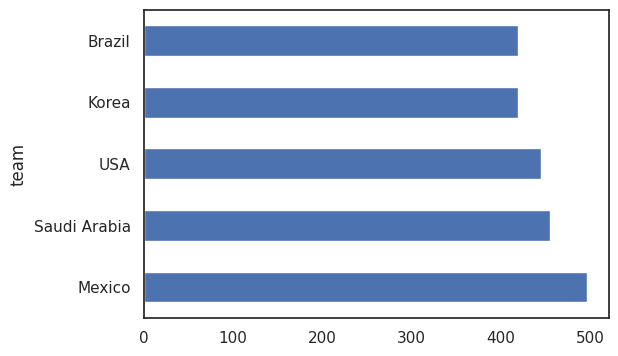

In [16]:
# 코드 16-16. 경기 수가 많은 나라 top5 시각화(plot 함수)

# seaborn의 테마와 그래프 크기 지정
import seaborn as sns
sns.set_theme(style='white', rc={'figure.figsize': (6, 4)})

# 경기 수가 많은 나라 top5 시각화
df_fifa['team'].value_counts()[:5].plot(kind='barh')

In [17]:
# 코드 16-17. 수평 막대그래프를 생성하는 사용자 정의 함수 plot_soccer 생성
import pandas as pd
import numpy as np
import seaborn as sns

# seaborn 라이브러리의 배경 테마를 white로 설정
sns.set_theme(style='white')

def plot_soccer(s, title='', f=0, unit='', figsize=(6, 3)):
    """
    수평 막대그래프를 생성하는 사용자 정의 함수

    매개변수(parameter)와 인수(argument):
        s(pandas.Series): 그래프를 그릴 대상인 데이터.
        title(str, optional): 그래프 제목. 기본값은 ''.
        unit(str, optional): 단위 표시. 기본값은 ''.
        f(int, optional): 소수점 자릿수 지정. 기본값은 0.
        figsize(tuple, optional): 그래프 크기 설정. 기본값은 (6, 3).
    """

    # 값이 최대인 국가는 네이비(navy)로 표기, 그 외 회색(darkgrey)으로 표기
    cond1 = s.eq(s.max())
    color = np.where(cond1, 'navy', 'darkgrey')

    # 그래프 생성
    ax = s.plot(kind='barh', color=color, figsize=figsize, width=.8, ylabel='')

    # 제목 설정(글자 크기 15, 볼드체, 왼쪽 정렬)
    ax.set_title(title, fontsize=15, fontweight='bold', loc='left')

    # y축 순서 뒤집기
    ax.invert_yaxis()

    # bar_label 추가(국가명)
    bar_label = ax.bar_label(
        ax.containers[0], labels=s.index, padding=-5, color='white',
        fontsize=12, fontweight='bold'
    )

    # 국가명을 오른쪽 정렬
    for label in bar_label:
        label.set_ha('right')

    # bar_label 추가(수치)
    ax.bar_label(ax.containers[0], padding=10, color='black',
                 fontsize=10, fmt='{:.' + str(f) + 'f} ' + unit)

    # x축과 y축 눈금 제거
    ax.set_xticks([])
    ax.set_yticks([])

    # 축 테두리 제거
    sns.despine(bottom=True, left=True)
    return ax

<Axes: title={'left': 'Most matches played Ranking'}>

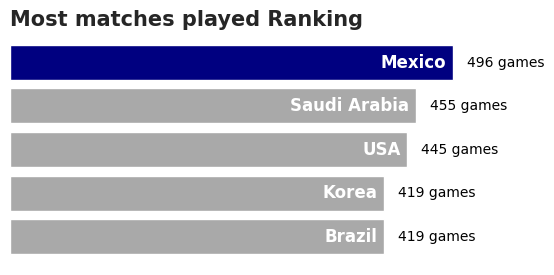

In [18]:
# 코드 16-18. 경기 수가 많은 나라 top5 시각화(사용자 정의 함수 plot_soccer)
s = df_fifa['team'].value_counts()[:5]
plot_soccer(s, title='Most matches played Ranking', unit='games')

<Axes: title={'left': 'Most matches played Ranking'}>

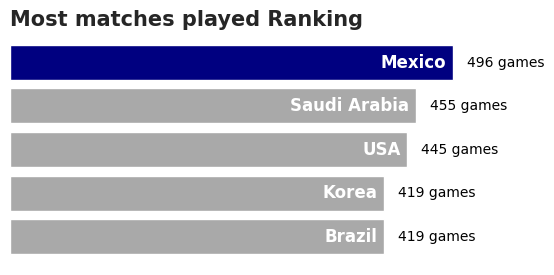

In [19]:
# 코드 16-19. 연속 메서드로 plot_soccer 함수 적용하기(pipe 함수)
(df_fifa['team']
 .value_counts()[:5]
 .pipe(plot_soccer, title='Most matches played Ranking', unit='games')
)

In [20]:
# 코드 16-20. 다승 랭킹 top5
cond1 = df_fifa['result'] == 'Win'
df_fifa.loc[cond1, 'team'].value_counts()[:5]

team
Brazil     282
Mexico     256
Spain      233
Germany    232
USA        230
Name: count, dtype: int64

<Axes: title={'left': 'Top Wins Ranking'}>

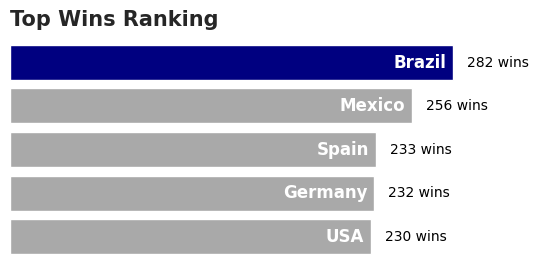

In [21]:
# 코드 16-21. 다승 랭킹 top5 시각화(사용자 정의 함수 plot_soccer)
(df_fifa.loc[cond1, 'team']
 .value_counts()[:5]
 .pipe(plot_soccer, title='Top Wins Ranking', unit='wins')
)

In [22]:
# 코드 16-22. 승리는 3점 무승부는 1점 패배는 0점을 부여하는 wp 열을 생성
m = {'Win':3, 'Draw':1, 'Lose':0}
df_fifa['wp'] = df_fifa['result'].map(m)
df_fifa

,date,team,continent,H/A,oppenent,op_continent,scored_goal,conceded_goal,tournament,result,wp
0,1994-01-02,Barbados,North America,Home,Grenada,North America,0,0,Frendly,Draw,1
1,1994-01-02,Grenada,North America,Away,Barbados,North America,0,0,Frendly,Draw,1
2,1994-01-02,Egypt,Africa,Home,Ghana,Africa,1,2,Frendly,Lose,0
...,...,...,...,...,...,...,...,...,...,...,...
46355,2021-12-30,Ethiopia,Africa,Away,Sudan,Africa,3,2,Frendly,Win,3
46356,2021-12-31,Comoros,Africa,Home,Malawi,Africa,1,2,Frendly,Lose,0
46357,2021-12-31,Malawi,Africa,Away,Comoros,Africa,2,1,Frendly,Win,3


In [23]:
# 코드 16-23. 경기당 평균 승점 랭킹 top5
df_fifa.groupby('team')['wp'].mean().sort_values(ascending=False)[:5]

team
Spain     2.24
Brazil    2.22
France    2.11
Germany   2.05
IR Iran   2.00
Name: wp, dtype: float64

<Axes: title={'left': 'Average Win Point per game'}>

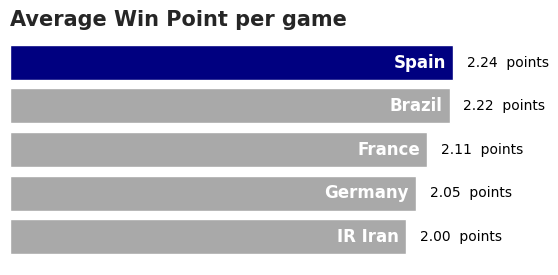

In [24]:
# 코드 16-24. 경기당 평균 승점 랭킹 top5 시각화(사용자 정의 함수 plot_soccer)
(df_fifa
 .groupby('team')['wp'].mean()
 .sort_values(ascending=False)[:5]
 .pipe(plot_soccer, title='Average Win Point per game', f=2, unit=' points')
)

In [25]:
# 코드 16-25. 다득점 랭킹 top 5
df_fifa.groupby('team')['scored_goal'].sum().nlargest(5)

team
Brazil     917
Germany    852
Mexico     834
Spain      757
Japan      753
Name: scored_goal, dtype: int64

<Axes: title={'left': 'Most Scored Goals Ranking'}>

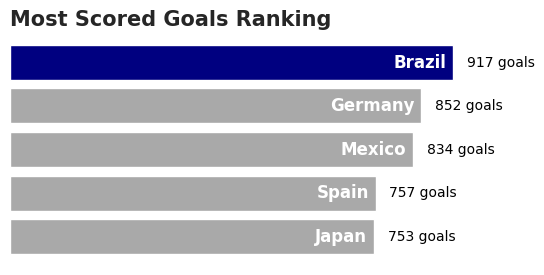

In [26]:
# 코드 16-26. 다득점 랭킹 top 5 시각화(사용자 정의 함수 plot_soccer)
(df_fifa
 .groupby('team')['scored_goal'].sum().nlargest(5)
 .pipe(plot_soccer, title='Most Scored Goals Ranking', unit='goals')
)

In [27]:
# 코드 16-27. 평균 득점 랭킹 top 5
df_fifa.groupby('team')['scored_goal'].mean().nlargest(5)

team
New Caledonia   2.27
Germany         2.25
Spain           2.20
Brazil          2.19
Australia       2.08
Name: scored_goal, dtype: float64

In [28]:
# 코드 16-28. 100경기 이상 국가의 평균 득점 랭킹 top5
cond2 = df_fifa.groupby('team')['scored_goal'].transform('count').ge(100)
df_fifa[cond2].groupby('team')['scored_goal'].mean().nlargest(5)

team
Germany       2.25
Spain         2.20
Brazil        2.19
Australia     2.08
Netherlands   2.03
Name: scored_goal, dtype: float64

<Axes: title={'left': 'Average Goals Ranking'}>

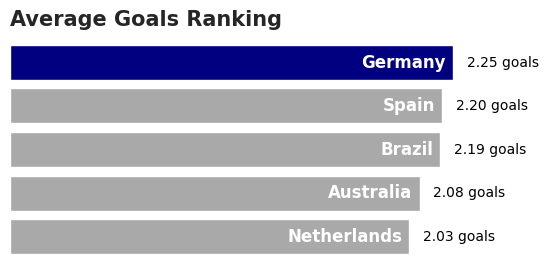

In [29]:
# 코드 16-29. 100경기 이상 국가의 평균 득점 랭킹 top5 시각화
(df_fifa[cond2]
 .groupby('team')['scored_goal'].mean()
 .nlargest(5)
 .pipe(plot_soccer, title='Average Goals Ranking', f=2, unit='goals')
)

- 가장 빈도수가 높은 매치 스코어 파악하기

In [30]:
# 코드 16-30. 경기당 하나의 행에서만 득점과 실점을 추출해, 행마다 개별 정렬
tmp = df_fifa.loc[::2, ['scored_goal', 'conceded_goal']]
tmp = pd.DataFrame(np.sort(tmp)).astype('str')
tmp

,0,1
0,0,0
1,1,2
2,1,1
...,...,...
23176,0,0
23177,2,3
23178,1,2


In [31]:
# 코드 16-31. 모든 스코어의 비율 집계
score = tmp[1].add(':').add(tmp[0]).value_counts(normalize=True)
score

1:0    0.19
2:0    0.13
2:1    0.13
       ... 
21:0   0.00
15:1   0.00
6:4    0.00
Name: proportion, Length: 56, dtype: float64

In [32]:
# 코드 16-32. 모든 스코어의 유일 값 확인
score.index

Index(['1:0', '2:0', '2:1', '1:1', '0:0', '3:0', '3:1', '4:0', '2:2', '3:2',
       '4:1', '5:0', '4:2', '6:0', '5:1', '7:0', '3:3', '6:1', '4:3', '5:2',
       '8:0', '7:1', '9:0', '8:1', '6:2', '5:3', '10:0', '11:0', '9:1', '7:2',
       '4:4', '8:2', '12:0', '9:2', '5:4', '13:0', '14:0', '10:1', '15:0',
       '17:0', '16:0', '6:3', '12:1', '7:3', '19:0', '11:1', '14:1', '8:3',
       '22:0', '5:5', '31:0', '10:2', '13:1', '21:0', '15:1', '6:4'],
      dtype='object')

<Axes: title={'left': 'Most Frequent Scores'}>

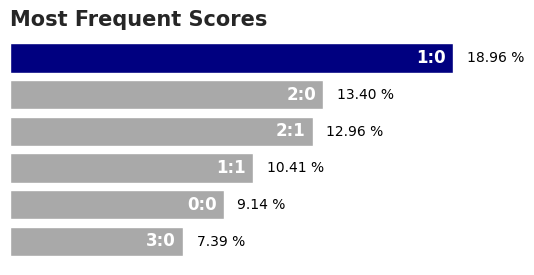

In [33]:
# 코드 16-33. 가장 빈도수가 높은 6개의 경기 스코어 시각화
plot_soccer(score[:6].mul(100), f=2, unit='%', title='Most Frequent Scores')

- 한국의 결과 분석하기

In [34]:
# 코드 16-34. 한국의 데이터만 필터링해 date 열을 인덱스로 설정하고 df_kr로 지정
df_kr = df_fifa[df_fifa['team'] == 'Korea'].set_index('date')
df_kr

,team,continent,H/A,oppenent,op_continent,scored_goal,conceded_goal,tournament,result,wp
date,,,,,,,,,,
1994-02-16,Korea,Asia,Home,Romania,Europe,1,2,Frendly,Lose,0
1994-02-26,Korea,Asia,Away,Colombia,South America,2,2,Frendly,Draw,1
1994-03-05,Korea,Asia,Away,USA,North America,0,1,Frendly,Lose,0
...,...,...,...,...,...,...,...,...,...,...
2021-10-12,Korea,Asia,Home,IR Iran,Asia,1,1,Others,Draw,1
2021-11-11,Korea,Asia,Home,United Arab Emirates,Asia,1,0,Others,Win,3
2021-11-16,Korea,Asia,Away,Iraq,Asia,3,0,Others,Win,3


In [35]:
# 코드 16-35. df_kr에서 2002년도의 데이터만 필터링
df_kr.loc['2002']

,team,continent,H/A,oppenent,op_continent,scored_goal,conceded_goal,tournament,result,wp
date,,,,,,,,,,
2002-01-19,Korea,Asia,Home,USA,North America,1,2,Others,Lose,0
2002-01-23,Korea,Asia,Away,Cuba,North America,0,0,Others,Draw,1
2002-01-27,Korea,Asia,Home,Mexico,North America,0,0,Others,Draw,1
...,...,...,...,...,...,...,...,...,...,...
2002-06-29,Korea,Asia,Away,Turkey,Europe,2,3,WC,Lose,0
2002-09-07,Korea,Asia,Away,Korea DPR,Asia,0,0,Frendly,Draw,1
2002-11-20,Korea,Asia,Away,Brazil,South America,2,3,Frendly,Lose,0


In [36]:
# 코드 16-36. 한국의 상대 대륙별 평균 득점, 평균 실점, 평균 승점 구하기
(df_kr
 .groupby('op_continent')[['scored_goal', 'conceded_goal', 'wp']].mean()
)

,scored_goal,conceded_goal,wp
op_continent,,,
Africa,1.38,1.25,1.57
Asia,1.88,0.69,2.01
Europe,1.21,1.40,1.32
North America,1.34,1.09,1.49
Oceania,1.24,0.76,1.82
South America,0.94,1.11,1.19


In [37]:
# 코드 16-37. 한국의 연도별 평균 승점
df_kr.resample('Y')['wp'].mean()

date
1994-12-31   1.29
1995-12-31   1.44
1996-12-31   1.60
             ... 
2019-12-31   2.22
2020-12-31   1.50
2021-12-31   2.30
Freq: A-DEC, Name: wp, Length: 28, dtype: float64

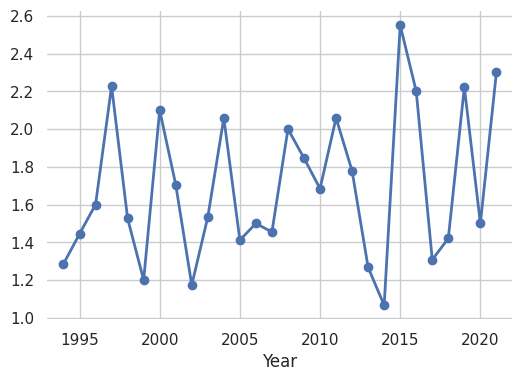

In [38]:
# 코드 16-38. 한국의 연도별 평균 승점 시각화
(df_kr
 .resample('Y')['wp'].mean()
 .plot(lw=2, marker='o', grid=True, xlim=('1993', '2022'), xlabel='Year')
)

# 축 테두리 제거
sns.despine(bottom=True, left=True)

### 16.4. 프랜차이즈의 거리 분석

In [39]:
# 코드 16-39. 올리브 영의 위치 데이터를 데이터 프레임으로 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
pd.options.display.float_format = '{:.3f}'.format # 소수점 셋째 자리 출력
url4 = 'https://github.com/panda-kim/book1/blob/main/29OY.xlsx?raw=true'
df_oy = pd.read_excel(url4)
df_oy

,상가번호,상호명,지점명,도로명주소,위도,경도
0,28509037,Olive Young,홈플러스금천점,서울특별시 금천구 시흥대로 387-2,37.469,126.897
1,28524815,Olive Young,압구정역점,서울특별시 강남구 논현로 878,37.527,127.029
2,20373924,Olive Young,NaN,서울특별시 서대문구 연세로 37,37.559,126.937
...,...,...,...,...,...,...
302,17018503,Olive Young,롯데마트중계점,서울특별시 노원구 노원로 330,37.647,127.071
303,16982130,Olive Young,공릉역점,서울특별시 노원구 동일로192길 74,37.627,127.077
304,17765282,Olive Young,NaN,서울특별시 성동구 독서당로62가길 12,37.550,127.032


In [40]:
# 코드 16-40. 커피 프랜차이즈의 위치 데이터를 데이터 프레임으로 불러오기
df_coffee = pd.read_excel(url4, sheet_name=1)
df_coffee

,상가번호,상호명,지점명,도로명주소,위도,경도
0,20659878,Coffee Bean,대학로대명거리점,서울특별시 종로구 대명길 25,37.583,127.000
1,24865557,Coffee Bean,낙성대역점,서울특별시 관악구 남부순환로 1909,37.478,126.962
2,20488125,Hollys,NaN,서울특별시 서초구 서초중앙로 52,37.487,127.016
...,...,...,...,...,...,...
1502,18437145,Paik's,고대구로병원점,서울특별시 구로구 구로동로 138,37.491,126.884
1503,18516556,Hollys,고덕그라시움후문점,서울특별시 강동구 동남로82길 77-1,37.561,127.161
1504,18448889,Paik's,상계보람점,서울특별시 노원구 한글비석로52길 16,37.665,127.067


In [41]:
# 코드 16-41. 각 커피 프랜차이즈의 매장 수 집계하기
df_coffee['상호명'].value_counts()

상호명
Starbucks      456
Ediya          428
Coffee Bean    184
Paik's         166
Gong Cha       139
Hollys         132
Name: count, dtype: int64

In [42]:
# 코드 16-42. 커피 프랜차이즈 매장과 올리브 영 매장의 곱집합 생성하기
df_raw = df_coffee.merge(df_oy, how='cross')
df_raw

,상가번호_x,상호명_x,지점명_x,도로명주소_x,위도_x,경도_x,상가번호_y,상호명_y,지점명_y,도로명주소_y,위도_y,경도_y
0,20659878,Coffee Bean,대학로대명거리점,서울특별시 종로구 대명길 25,37.583,127.000,28509037,Olive Young,홈플러스금천점,서울특별시 금천구 시흥대로 387-2,37.469,126.897
1,20659878,Coffee Bean,대학로대명거리점,서울특별시 종로구 대명길 25,37.583,127.000,28524815,Olive Young,압구정역점,서울특별시 강남구 논현로 878,37.527,127.029
2,20659878,Coffee Bean,대학로대명거리점,서울특별시 종로구 대명길 25,37.583,127.000,20373924,Olive Young,NaN,서울특별시 서대문구 연세로 37,37.559,126.937
...,...,...,...,...,...,...,...,...,...,...,...,...
459022,18448889,Paik's,상계보람점,서울특별시 노원구 한글비석로52길 16,37.665,127.067,17018503,Olive Young,롯데마트중계점,서울특별시 노원구 노원로 330,37.647,127.071
459023,18448889,Paik's,상계보람점,서울특별시 노원구 한글비석로52길 16,37.665,127.067,16982130,Olive Young,공릉역점,서울특별시 노원구 동일로192길 74,37.627,127.077
459024,18448889,Paik's,상계보람점,서울특별시 노원구 한글비석로52길 16,37.665,127.067,17765282,Olive Young,NaN,서울특별시 성동구 독서당로62가길 12,37.550,127.032


In [43]:
# haversine 라이브러리 설치
!pip install haversine

In [44]:
# 코드 16-43. 각 행에서 올리브 영과 커피 프랜차이즈의 거리 구하기
import haversine

# apply와 lambda 함수로 행마다 haversine.haversine 함수 적용하기
df_raw['거리'] = df_raw.apply(
    lambda x: haversine.haversine(
        [x['위도_x'], x['경도_x']], [x['위도_y'], x['경도_y']], unit='m'
    ),
    axis=1
)
df_raw

,상가번호_x,상호명_x,지점명_x,도로명주소_x,위도_x,경도_x,상가번호_y,상호명_y,지점명_y,도로명주소_y,위도_y,경도_y,거리
0,20659878,Coffee Bean,대학로대명거리점,서울특별시 종로구 대명길 25,37.583,127.000,28509037,Olive Young,홈플러스금천점,서울특별시 금천구 시흥대로 387-2,37.469,126.897,15654.999
1,20659878,Coffee Bean,대학로대명거리점,서울특별시 종로구 대명길 25,37.583,127.000,28524815,Olive Young,압구정역점,서울특별시 강남구 논현로 878,37.527,127.029,6730.123
2,20659878,Coffee Bean,대학로대명거리점,서울특별시 종로구 대명길 25,37.583,127.000,20373924,Olive Young,NaN,서울특별시 서대문구 연세로 37,37.559,126.937,6213.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459022,18448889,Paik's,상계보람점,서울특별시 노원구 한글비석로52길 16,37.665,127.067,17018503,Olive Young,롯데마트중계점,서울특별시 노원구 노원로 330,37.647,127.071,2083.372
459023,18448889,Paik's,상계보람점,서울특별시 노원구 한글비석로52길 16,37.665,127.067,16982130,Olive Young,공릉역점,서울특별시 노원구 동일로192길 74,37.627,127.077,4339.406
459024,18448889,Paik's,상계보람점,서울특별시 노원구 한글비석로52길 16,37.665,127.067,17765282,Olive Young,NaN,서울특별시 성동구 독서당로62가길 12,37.550,127.032,13200.886


In [45]:
# 코드 16-44. 커피 프랜차이즈의 개별 매장에서 올리브 영과의 거리 구하기
df_result = (
    df_raw
    .groupby(['상가번호_x'])
    .agg(프랜차이즈=('상호명_x', 'first'), 거리=('거리', 'min'))
    .reset_index()
)
df_result

,상가번호_x,프랜차이즈,거리
0,4119889,Gong Cha,68.335
1,4704621,Starbucks,85.269
2,5133712,Starbucks,0.000
...,...,...,...
1502,28520792,Gong Cha,304.308
1503,28521414,Gong Cha,1136.137
1504,28523473,Gong Cha,274.208


In [46]:
# 코드 16-45. 모든 커피 프랜차이즈 매장의 올리브 영과의 평균 거리 집계
df_result['거리'].mean()

368.784679064985

In [47]:
# 코드 16-46. 커피 프랜차이즈별 올리브 영과의 평균 거리 집계
df_result.groupby('프랜차이즈')['거리'].mean()

프랜차이즈
Coffee Bean   286.101
Ediya         523.555
Gong Cha      278.054
Hollys        326.851
Paik's        330.630
Starbucks     310.567
Name: 거리, dtype: float64

<Axes: >

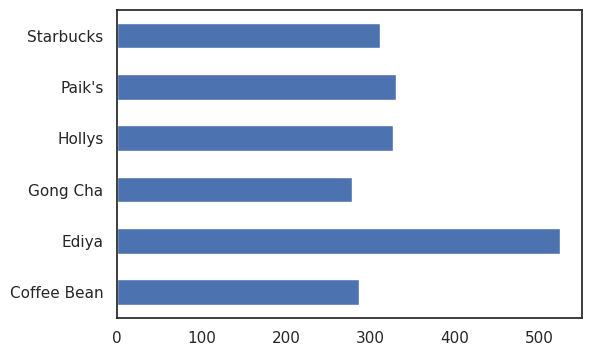

In [48]:
# 코드 16-47. 커피 프랜차이즈별 올리브 영과의 평균 거리 시각화
(df_result
 .groupby('프랜차이즈')['거리'].mean()
 .plot(kind='barh', ylabel='')
)

In [49]:
# 코드 16-48. 수평 막대그래프를 생성하는 사용자 정의 함수 plot_coffee 생성
import pandas as pd
import numpy as np
import seaborn as sns

# seaborn 라이브러리의 배경 테마를 white로 설정
sns.set_theme(style='white')

def plot_coffee(s, title='', f=0, unit='', figsize=(6, 3)):
    """
    수평 막대그래프를 생성하는 사용자 정의 함수

    매개변수(parameter)와 인수(argument):
        s(pandas.Series): 그래프를 그릴 대상인 데이터.
        title(str, optional): 그래프 제목. 기본값은 ''.
        unit(str, optional): 단위 표시. 기본값은 ''.
        f(int, optional): 소수점 자릿수 지정. 기본값은 0.
        figsize(tuple, optional): 그래프 크기 설정. 기본값은 (6, 3).
    """

    # 스타벅스는 초록색(#006c48), 그 외 회색(darkgrey)
    cond1 = s.index == 'Starbucks'
    color = np.where(cond1, '#006c48', 'darkgrey')

    # 그래프 생성
    ax = s.plot(kind='barh', color=color, figsize=figsize, width=.8, ylabel='')

    # 제목 설정(글자 크기 15, 볼드체, 왼쪽 정렬, 초록색)
    ax.set_title(title, fontsize=12, fontweight='bold', loc='left',
                 color='#006c48')

    # bar_label 추가(프랜차이즈 이름)
    bar_label = ax.bar_label(
        ax.containers[0], labels=s.index, padding=-5, color='white',
        fontsize=10, fontweight='bold'
    )

    # 프랜차이즈 이름을 오른쪽 정렬
    for label in bar_label:
        label.set_ha('right')

    # bar_label 추가(수치)
    ax.bar_label(ax.containers[0], padding=10, color='black',
                fontsize=10, fmt='{:.' + str(f) + 'f} ' + unit)

    # x축과 y축 눈금 제거
    ax.set_xticks([])
    ax.set_yticks([])

    # 축 테두리 제거
    sns.despine(bottom=True, left=True)
    return ax

<Axes: title={'left': 'Average distance to Olive Young'}>

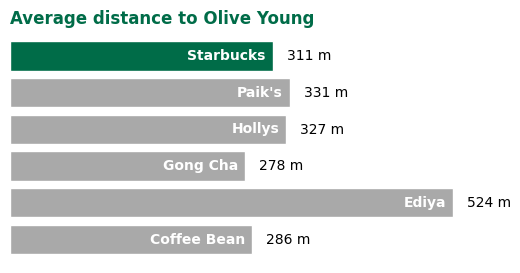

In [50]:
# 코드 16-49. 커피 프랜차이즈별 올리브 영과의 평균 거리 시각화
(df_result
 .groupby('프랜차이즈')['거리'].mean()
 .pipe(plot_coffee, unit='m',
       title='Average distance to Olive Young'
       )
)

In [51]:
# 코드 16-50. df_result에 거리가 0m 인지 확인하는 0m 열 생성
df_result['0m'] = df_result['거리'].eq(0)
df_result

,상가번호_x,프랜차이즈,거리,0m
0,4119889,Gong Cha,68.335,False
1,4704621,Starbucks,85.269,False
2,5133712,Starbucks,0.000,True
...,...,...,...,...
1502,28520792,Gong Cha,304.308,False
1503,28521414,Gong Cha,1136.137,False
1504,28523473,Gong Cha,274.208,False


In [52]:
# 코드 16-51. 프랜차이즈별 올리브 영과 거리가 0m인 매장 수를 집계
df_result.groupby('프랜차이즈')['0m'].sum()

프랜차이즈
Coffee Bean     9
Ediya          15
Gong Cha       14
Hollys         13
Paik's          7
Starbucks      33
Name: 0m, dtype: int64

<Axes: title={'left': 'Stores in the same location with Olive Young'}>

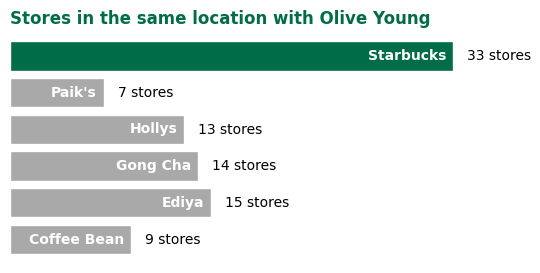

In [53]:
# 코드 16-52. 프랜차이즈별 올리브 영과 거리가 0m인 매장 수를 시각화
(df_result
 .groupby('프랜차이즈')['0m'].sum()
 .pipe(plot_coffee, unit='stores',
       title='Stores in the same location with Olive Young'
       )
)

In [54]:
# 코드 16-53. 올리브 영과 거리가 0m인 매장 확인하기
df_raw[df_raw['거리'].eq(0)]

,상가번호_x,상호명_x,지점명_x,도로명주소_x,위도_x,경도_x,상가번호_y,상호명_y,지점명_y,도로명주소_y,위도_y,경도_y,거리
1841,20023467,Coffee Bean,청담성당점,서울특별시 강남구 삼성로 716,37.520,127.050,28513303,Olive Young,청담역점,서울특별시 강남구 삼성로 716,37.520,127.050,0.000
5945,23375653,Starbucks,중랑구청점,서울특별시 중랑구 신내로 72,37.605,127.096,25294982,Olive Young,신내점,서울특별시 중랑구 신내로 72,37.605,127.096,0.000
12440,5133712,Starbucks,코엑스몰점,서울특별시 강남구 영동대로 513,37.512,127.059,12517307,Olive Young,코엑스몰점,서울특별시 강남구 영동대로 513,37.512,127.059,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446002,18095458,Paik's,가산SKV1점,서울특별시 금천구 가산디지털1로 171,37.481,126.881,16244577,Olive Young,NaN,서울특별시 금천구 가산디지털1로 171,37.481,126.881,0.000
449577,18053843,Gong Cha,길음뉴타운점,서울특별시 성북구 길음로 33,37.605,127.022,28514259,Olive Young,길음점,서울특별시 성북구 길음로 33,37.605,127.022,0.000
454132,18330056,Gong Cha,마곡역점,서울특별시 강서구 공항대로 168,37.559,126.826,16640824,Olive Young,마곡역점,서울특별시 강서구 공항대로 168,37.559,126.826,0.000


In [55]:
# 코드 16-54. 모든 프랜차이즈에서 올리브 영과 거리가 0m인 매장 비율 집계
df_result['0m'].mean()

0.06046511627906977

In [56]:
# 코드 16-55. 프랜차이즈별 올리브 영과 거리가 0m인 매장 비율 집계
df_result.groupby('프랜차이즈')['0m'].mean()

프랜차이즈
Coffee Bean   0.049
Ediya         0.035
Gong Cha      0.101
Hollys        0.098
Paik's        0.042
Starbucks     0.072
Name: 0m, dtype: float64

<Axes: title={'left': 'Percentage in the same location with Olive Young'}>

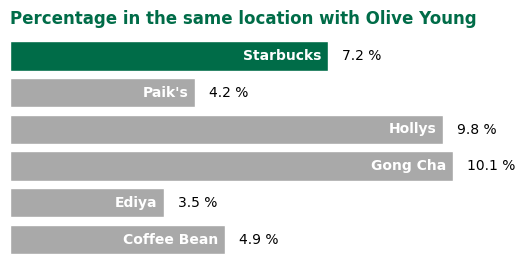

In [57]:
# 코드 16-56. 프랜차이즈별 올리브 영과 거리가 0m인 매장 비율 시각화
(df_result
 .groupby('프랜차이즈')['0m'].mean().mul(100)
 .pipe(plot_coffee, unit='%', f=1,
       title='Percentage in the same location with Olive Young'
       )
)

In [58]:
# 코드 16-57. 그루퍼로 프랜차이즈별 거리가 20m 이내인 매장 수를 집계하기
s = df_result['거리'].le(20)
s.groupby(df_result['프랜차이즈']).sum()

프랜차이즈
Coffee Bean    10
Ediya          16
Gong Cha       14
Hollys         13
Paik's          8
Starbucks      37
Name: 거리, dtype: int64

In [59]:
# 코드 16-58. 그루퍼로 프랜차이즈별 거리가 20m 이내인 매장 비율 집계하기
s.groupby(df_result['프랜차이즈']).mean()

프랜차이즈
Coffee Bean   0.054
Ediya         0.037
Gong Cha      0.101
Hollys        0.098
Paik's        0.048
Starbucks     0.081
Name: 거리, dtype: float64

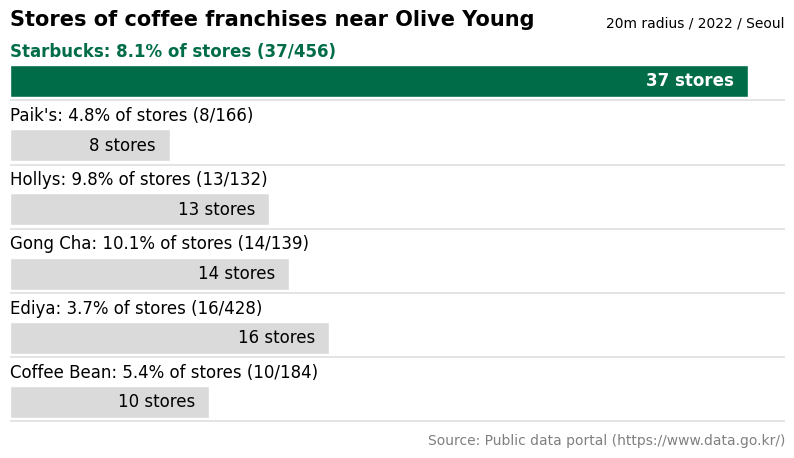

In [60]:
# 코드 16-59. 프랜차이즈별 거리가 20m 이내인 매장수와 매장 비율 시각화
import matplotlib.pyplot as plt

# 그림 및 축 생성
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# 색상 설정(초록색, 회색, 검은색, 회색)
cmap = ['#006c48', '#dadada', 'black', 'grey']

# 프랜차이즈별 거리가 20m 이내인 매장 수를 집계
s = df_result['거리'].le(20)
s1 = s.groupby(df_result['프랜차이즈']).sum()

# 각 프랜차이즈의 총 매장수 집계하기
s2 = df_result['프랜차이즈'].value_counts().sort_index()

# 수평 막대그래프의 색상 설정(스타벅스만 초록색과 나머지는 회색)
color_bar = [cmap[0] if cafe == 'Starbucks' else cmap[1] for cafe in s1.index]

# 수평 막대그래프 생성
s1.plot(kind='barh', color=color_bar, width=.5, ylabel='', ax=ax)

# 막대그래프의 레이블 표기 및 정렬
bar_label = ax.bar_label(ax.containers[0], padding=-10, color=cmap[2],
                         fontsize=12, fmt='{:.0f} stores')
for label in bar_label:
    label.set_ha('right') # 막대그래프 레이블의 우측 정렬

# 스타벅스의 막대그래프 레이블만 흰색과 볼드체로 설정
loc_sb = s1.index.get_loc('Starbucks')
label_sb = bar_label[loc_sb]
label_sb.set_color('white')
label_sb.set_fontweight('bold')

# 텍스트 생성
txt = (s1.index + ': ' + s1.div(s2).mul(100).round(1).astype('str') + '%' +
       ' of stores (' + s1.astype('str') + '/' + s2.astype('str') + ')')

# 텍스트 표시 및 수평 구분선 추가
for i in range(0, 6):
    if i == loc_sb:
        c, w = cmap[0], 'bold'  # 스타벅스는 초록색, 굵은 글씨
    else:
        c, w = cmap[2], 'normal' # 나머지는 검은색, 일반 글씨

    plt.text(0, i + 0.38, txt[i], size=12, color=c, weight=w) # 텍스트 표시
    plt.axhline(y=i - .3, color='grey', lw=0.3)  # 수평 구분선 추가

# 제목 설정
plt.text(0, 1.05, 'Stores of coffee franchises near Olive Young', size=15,
         weight='bold', color=cmap[2], va='bottom', transform=ax.transAxes)

# 설명 문구 설정
plt.text(1, 1.05, '20m radius / 2022 / Seoul', size=10, color=cmap[2],
         va='bottom', ha='right', transform=ax.transAxes)

# 출처 표시
plt.text(1, 0, 'Source: Public data portal (https://www.data.go.kr/)', size=10,
         color=cmap[3], va='top', ha='right', transform=ax.transAxes)

# 축 눈금 제거
ax.set_xticks([])
ax.set_yticks([])

# 축 테두리 제거
sns.despine(bottom=True, left=True)

### 16.5. 빅데이터와 증권사 잔고 분석

In [61]:
# 코드 16-60. 증권회사 실무 데이터의 2행만 데이터 프레임으로 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째 자리 출력
url5 = 'https://github.com/panda-kim/book1/blob/main/30secfirm01.csv?raw=true'
df_test = pd.read_csv(url5, encoding='cp949', nrows=2)
df_test

,Date,Team,Ticker,Type,Grade,Price,Currency,Exchange_Rate,Price(KRW)
0,2023-01-01,TM1,R100,S,AAA,671.00,KRW,1.00,671
1,2023-01-01,TM1,R100,S,AAA,265.00,KRW,1.00,265


In [62]:
# 코드 16-61. 2행만 불러온 데이터 프레임에서 columns 확인
df_test.columns

Index(['Date', 'Team', 'Ticker', 'Type', 'Grade', 'Price', 'Currency',
       'Exchange_Rate', 'Price(KRW)'],
      dtype='object')

In [63]:
# 코드 16-62. 30secfirm01.csv 파일에서 필요한 열만 데이터 프레임으로 불러오기
cols = ['Date', 'Team', 'Ticker', 'Type', 'Price(KRW)']
pd.read_csv(url5, encoding='cp949', usecols=cols, parse_dates=['Date'])

,Date,Team,Ticker,Type,Price(KRW)
0,2023-01-01,TM1,R100,S,671
1,2023-01-01,TM1,R100,S,265
2,2023-01-01,TM1,R100,S,132
...,...,...,...,...,...
158959,2023-01-31,TM4,W731,B,64
158960,2023-01-31,TM4,W732,B,128
158961,2023-01-31,TM4,W734,B,60


In [64]:
# 코드 16-63. 두 번째 31secfirm02.csv 파일에서 데이터 프레임 불러오기
url6 = 'https://github.com/panda-kim/book1/blob/main/31secfirm02.csv?raw=true'
cols = ['Date', 'Team', 'Ticker', 'Type', 'Price(KRW)']
df = pd.read_csv(url6, encoding='cp949', usecols=cols, parse_dates=['Date'])
df

,Date,Team,Ticker,Type,Price(KRW)
0,2023-01-01,TM1,R100,S,671
1,2023-01-01,TM1,R100,S,265
2,2023-01-01,TM1,R100,S,132
...,...,...,...,...,...
1011729,2023-06-30,TM4,W732,B,63
1011730,2023-06-30,TM4,W733,B,65
1011731,2023-06-30,TM4,W734,B,62


In [65]:
# 코드 16-64. 특정 일자(2023-03-31)의 데이터 필터링
df[df['Date'].eq('2023-03-31')]

,Date,Team,Ticker,Type,Price(KRW)
478490,2023-03-31,TM1,R100,S,129
478491,2023-03-31,TM1,R100,S,133
478492,2023-03-31,TM1,R100,S,135
...,...,...,...,...,...
484061,2023-03-31,TM4,W734,B,65
484062,2023-03-31,TM4,W734,B,62
484063,2023-03-31,TM4,W734,B,131


In [66]:
# 코드 16-65. 특정 기간의 데이터 필터링
df[df['Date'].between('2023-02-01', '2023-02-06')]

,Date,Team,Ticker,Type,Price(KRW)
158962,2023-02-01,TM1,R100,S,134
158963,2023-02-01,TM1,R100,S,132
158964,2023-02-01,TM1,R100,S,537
...,...,...,...,...,...
191613,2023-02-06,TM4,W732,B,128
191614,2023-02-06,TM4,W733,B,59
191615,2023-02-06,TM4,W734,B,64


In [67]:
# 코드 16-66. 일자별, 팀별, 상품 유형별 잔고 집계
df_result = (
    df.groupby(['Team', 'Type'])
      .resample('D', on='Date')['Price(KRW)'].sum()
      .unstack(1).swaplevel(0, 1).sort_index(level=0)
)
df_result

Type                  B         S
Date       Team                  
2023-01-01 TM1      NaN 256350.00
           TM3      NaN  33132.00
           TM4   399.00   5284.00
...                 ...       ...
2023-06-30 TM4  9581.00   4258.00
           TM5  1608.00  83201.00
           TM6      NaN  30833.00

[1085 rows x 2 columns]

In [68]:
# 코드 16-67. 특정 일자(2023-03-31)의 데이터에서 상품 유형별 팀별 잔고 집계
df_result.loc['2023-03-31']

Type,B,S
Team,,
TM1,NaN,225832.00
TM2,NaN,59677.00
TM3,NaN,25096.00
TM4,10314.00,6515.00
TM5,1340.00,92821.00
TM6,NaN,43080.00


In [69]:
# 코드 16-68. 특정 두 시점의 팀별 잔고 변화
date1 = '2023-03-31'
date2 = '2023-06-30'
df_result.loc[date1].sub(df_result.loc[date2], fill_value=0)

Type,B,S
Team,,
TM1,NaN,-22029.00
TM2,NaN,-6891.00
TM3,NaN,9203.00
TM4,733.00,2257.00
TM5,-268.00,9620.00
TM6,NaN,12247.00


In [70]:
# 코드 16-69. 특정 기간의 팀별 잔고 집계(전체 집계 결과에서 인덱싱)
(df_result
 .loc['2023-02-01': '2023-02-06']
 .sum(axis=1).unstack().astype('int')
)

Team,TM1,TM2,TM3,TM4,TM5,TM6
Date,,,,,,
2023-02-01,235187,63352,49818,17814,90163,47583
2023-02-02,224894,60800,54397,18789,76711,44405
2023-02-03,255492,57359,49222,16809,82806,41870
2023-02-04,244184,59615,46064,18086,71938,53346
2023-02-05,249285,61033,47126,18442,70335,57485
2023-02-06,225854,62375,46651,19942,71774,51415


In [71]:
# 코드 16-70. 특정 기간의 팀별 잔고 집계(필터링 후 집계)
(df[df['Date'].between('2023-02-01', '2023-02-06')]
 .reset_index(drop=True)
 .groupby('Team')
 .resample(rule='D', on='Date')['Price(KRW)'].sum()
 .unstack(level=0)
)

Team,TM1,TM2,TM3,TM4,TM5,TM6
Date,,,,,,
2023-02-01,235187,63352,49818,17814,90163,47583
2023-02-02,224894,60800,54397,18789,76711,44405
2023-02-03,255492,57359,49222,16809,82806,41870
2023-02-04,244184,59615,46064,18086,71938,53346
2023-02-05,249285,61033,47126,18442,70335,57485
2023-02-06,225854,62375,46651,19942,71774,51415


In [72]:
# 코드 16-71. 일자별 전체 잔고 집계
s = df.resample('D', on='Date')['Price(KRW)'].sum()
s

Date
2023-01-01    421327
2023-01-02    411415
2023-01-03    404047
               ...  
2023-06-28    460625
2023-06-29    467692
2023-06-30    459803
Freq: D, Name: Price(KRW), Length: 181, dtype: int64

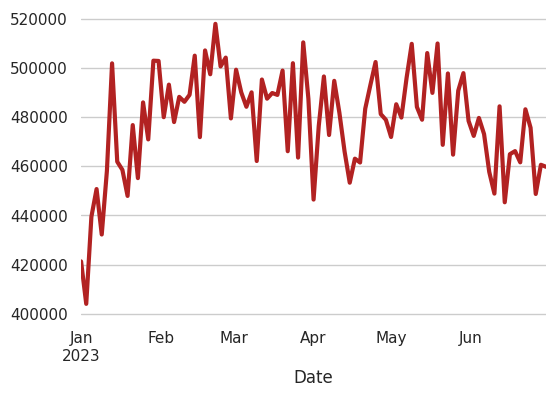

In [73]:
# 코드 16-72. 일자별 전체 잔고 시각화
import seaborn as sns
# seaborn 라이브러리의 배경 테마를 white로 설정
sns.set_theme(style='white')

# 2일 기준으로 그래프 생성
ax = s[::2].plot(lw=3, color='firebrick')

# y축 눈금 생성
ax.grid(axis='y')

# 축 테두리 제거
sns.despine(bottom=True, left=True)

In [74]:
# 코드 16-73. 월별 마지막 날의 전체 잔고 확인
s.resample('M').last()

Date
2023-01-31    502868
2023-02-28    479495
2023-03-31    464675
2023-04-30    481546
2023-05-31    478489
2023-06-30    459803
Freq: M, Name: Price(KRW), dtype: int64

In [75]:
# 코드 16-74. 분기별로 시간에 흐름에 따라 전체 잔고 집계(그루퍼 사용)
grp1 = s.index.to_period('Q')
grp2 = s.groupby(grp1).cumcount()
df_quarter = s.groupby([grp1, grp2]).sum().unstack(0)
df_quarter

Date,2023Q1,2023Q2
0,421327.00,446471.00
1,411415.00,463520.00
2,404047.00,476356.00
...,...,...
88,487432.00,460625.00
89,464675.00,467692.00
90,NaN,459803.00


In [76]:
# 코드 16-75. 분기별로 시간에 흐름에 따라 전체 잔고 집계(열 생성)
df_quarter = s.reset_index()
df_quarter['Q'] = df_quarter['Date'].dt.to_period('Q')
df_quarter['D+'] = df_quarter.groupby('Q').cumcount()
df_quarter = (df_quarter
              .pivot(index='D+', columns='Q', values='Price(KRW)')
              .rename_axis(index='Date', columns=None)
)
df_quarter

,2023Q1,2023Q2
Date,,
0,421327.00,446471.00
1,411415.00,463520.00
2,404047.00,476356.00
...,...,...
88,487432.00,460625.00
89,464675.00,467692.00
90,NaN,459803.00


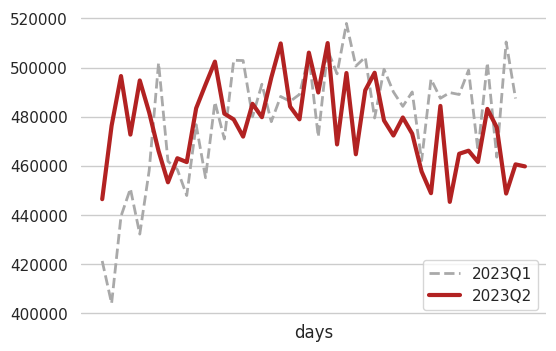

In [77]:
# 코드 16-76. 분기별로 시간에 흐름에 따라 전체 잔고 집계 결과 시각화

# 2023년 1분기 시각화
(df_quarter.loc[::2, '2023Q1']
 .plot(lw=2, ls='--', color='darkgrey', legend=True, grid=True, xticks=[])
)

# 2023년 2분기 시각화
(df_quarter.loc[::2, '2023Q2']
 .plot(lw=3, grid=True, legend=True, color='firebrick', xlabel='days')
)

# 축 테두리 제거
sns.despine(bottom=True, left=True)

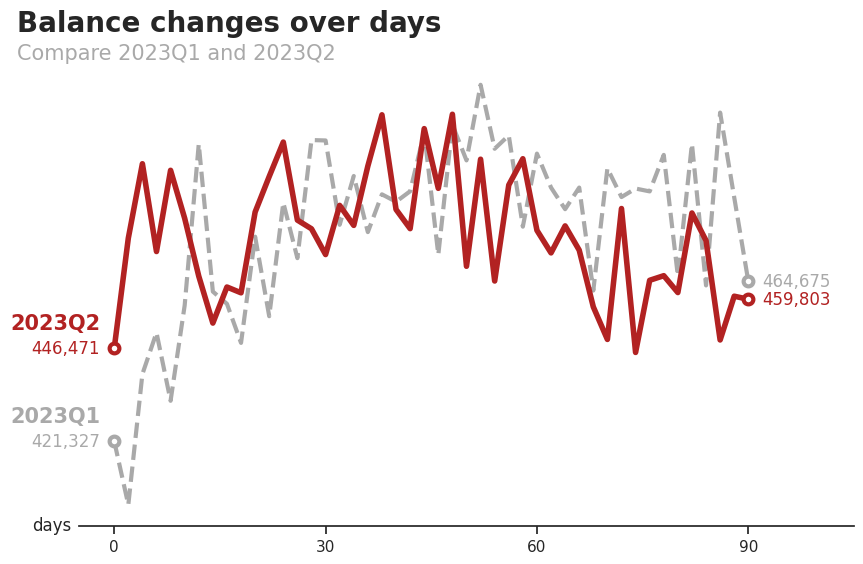

In [78]:
# 코드 16-77. 분기별로 시간에 흐름에 따라 전체 잔고 집계 시각화(2)

import seaborn as sns
import matplotlib.pyplot as plt

# seaborn 스타일 설정(ticks 테마)
sns.set_theme(style='ticks')

# 색상 변수 정의
c = ['darkgrey', 'firebrick']

# 2023년 1분기 데이터 추출 및 시각화
ax1 = df_quarter.ffill().loc[::2, '2023Q1'].plot(
    lw=3, ls='--', color=c[0], yticks=[], figsize=(10, 6),
    xlim=(-5, 105), xticks=[0, 30, 60, 90], xlabel=''
)

# 2023년 1분기 마지막 데이터 좌표 추출
x1, y1 = df_quarter.index[-1], df_quarter.ffill()['2023Q1'].iloc[-1]

# 간격을 변수로 설정
itv = 2

# 마커 및 텍스트 표시(2023년 1분기 끝)
plt.plot(x1, y1, marker='o', mfc='white', mec=c[0], ms=7, mew=3)
plt.text(x1 + itv, y1, f'{y1:,.0f}', color=c[0], size=12, va='center')

# 2023년 1분기 첫 데이터 좌표 추출
x2, y2 = df_quarter.index[0], df_quarter['2023Q1'].iloc[0]

# 마커 및 텍스트 표시(2023년 1분기 시작)
plt.plot(x2, y2, marker='o', mfc='white', mec=c[0], ms=7, mew=3)
plt.text(x2 - itv, y2, f'{y2:,.0f}', color=c[0], size=12,
         va='center', ha='right')

# 2023년 1분기 범례를 그래프 안에서 지칭
plt.text(x2 - itv, y2 + 5000, '2023Q1', color=c[0], weight='bold',
         size=15, ha='right')

# 2023년 2분기 데이터 시각화
df_quarter.loc[::2, '2023Q2'].plot(lw=4, color=c[1], xlabel='')

# 2023년 2분기 마지막 데이터 추출
y3 = df_quarter['2023Q2'].iloc[-1]

# 마커 및 텍스트 표시(2023년 2분기 끝)
plt.plot(x1, y3, marker='o', mfc='white', mec=c[1], ms=7, mew=3)
plt.text(x1 + itv, y3, f'{y3:,.0f}', color=c[1], size=12, va='center')

# 2023년 2분기 첫 데이터 추출
y4 = df_quarter['2023Q2'].iloc[0]

# 마커 및 텍스트 표시(2023년 2분기 시작)
plt.plot(x2, y4, 'o', mfc='white', mec=c[1], ms=7, mew=3)
plt.text(x2 - itv, y4, f'{y4:,.0f}', color=c[1], size=12,
         va='center', ha='right')

# 2023년 2분기 범례를 그래프 안에서 지칭
plt.text(x2 - itv, y4 + 5000, '2023Q2', color=c[1], weight='bold',
         size=15, ha='right')

# x축의 이름 지정
plt.text(-0.01, -0, 'days', transform=ax1.transAxes, size=12,
         va='center', ha='right')

# 제목과 소제목 지정
plt.text(-0.08, 1.07, 'Balance changes over days', size=20, weight='bold',
         transform=ax1.transAxes)

plt.text(-0.08, 1.01, 'Compare 2023Q1 and 2023Q2', color=c[0], size=15,
         transform=ax1.transAxes)

# 축 테두리 제거
sns.despine(left=True)